<a href="https://colab.research.google.com/github/SujayVivek/SPML-LAB-4thYR/blob/main/SPLabAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Defining Functions

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    W = np.exp(-2j * np.pi * k * n / N)
    return W.dot(x)

def idft(X):
    X = np.asarray(X, dtype=complex)
    N = X.shape[0]
    k = np.arange(N)
    n = k.reshape((N, 1))
    W_inv = np.exp(2j * np.pi * k * n / N)
    return np.real(W_inv.dot(X)) / N

In [23]:
def dct(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    result = np.zeros(N)
    for k in range(N):
        alpha = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)
        result[k] = alpha * np.sum(x * np.cos(np.pi * k * (2*np.arange(N)+1) / (2*N)))
    return result

def idct(c):
    c = np.asarray(c, dtype=float)
    N = c.shape[0]
    result = np.zeros(N)
    for n in range(N):
        s = 0
        for k in range(N):
            alpha = np.sqrt(1/N) if k == 0 else np.sqrt(2/N)
            s += alpha * c[k] * np.cos(np.pi * k * (2*n+1) / (2*N))
        result[n] = s
    return result

In [24]:
def dst(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    result = np.zeros(N)
    alpha = np.sqrt(2/N)
    for k in range(N):
        result[k] = alpha * np.sum(x * np.sin(np.pi * (k+1) * (2*np.arange(N)+1) / (2*N)))
    return result

def idst(s):
    s = np.asarray(s, dtype=float)
    N = s.shape[0]
    result = np.zeros(N)
    alpha = np.sqrt(2/N)
    for n in range(N):
        result[n] = alpha * np.sum(s * np.sin(np.pi * (np.arange(N)+1) * (2*n+1) / (2*N)))
    return result

##Plotting the Continuous Signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
F0 = 1.0           # fundamental frequency (Hz)
Omega = 2 * np.pi * F0
ts = 1 / 20.0       # sampling period (s)
fs = 1 / ts         # sampling frequency (Hz)
T = 1.0             # total duration (s)

In [4]:
t = np.arange(0, T, ts)
s1 = np.sin(Omega*t) + (1/3)*np.cos(3*Omega*t)

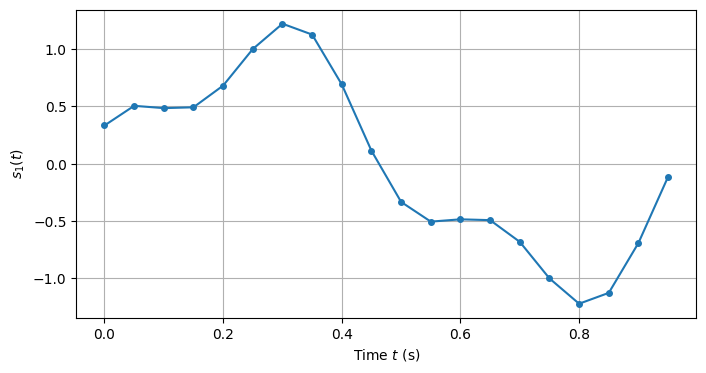

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(t, s1, '-o', markersize=4)
# plt.title(r"Signal $s_1(t) = \sin(\Omega t) + \tfrac{1}{3}\cos(3\Omega t)$")
plt.xlabel('Time $t$ (s)')
plt.ylabel('$s_1(t)$')
plt.grid(True)
plt.show()

So we have a sampling period of 1/20s or a sampling frequency of 20Hz

##Computing DFT of s1

In [25]:
N = len(s1)
S_fft = dft(s1)
freqs = np.fft.fftfreq(N, ts)

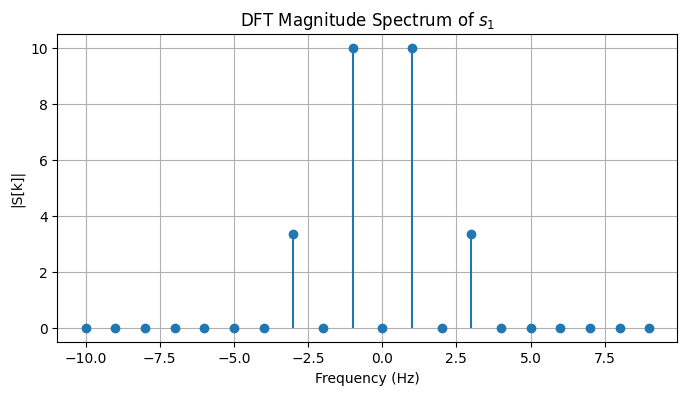

In [26]:
#magnitude plot
plt.figure(figsize=(8, 4))
plt.stem(freqs, np.abs(S_fft), basefmt=" ")
plt.title('DFT Magnitude Spectrum of $s_1$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|S[k]|')
plt.grid(True)
plt.show()

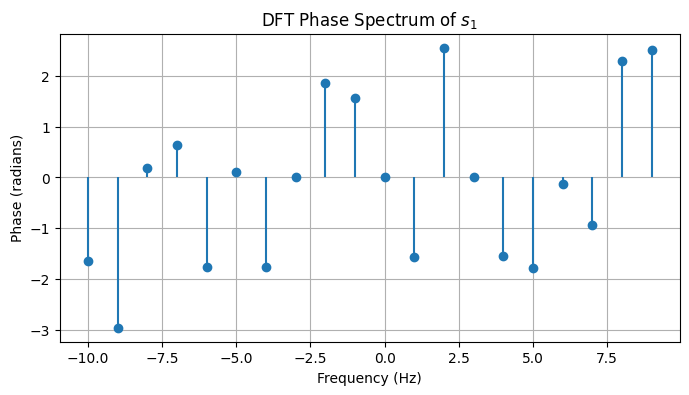

In [27]:
#phase plot
plt.figure(figsize=(8, 4))
plt.stem(freqs, np.angle(S_fft), basefmt=" ")
plt.title('DFT Phase Spectrum of $s_1$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)
plt.show()

##Computing DCT & DST of s1

In [28]:
S_dct = dct(s1)
S_dst = dst(s1)

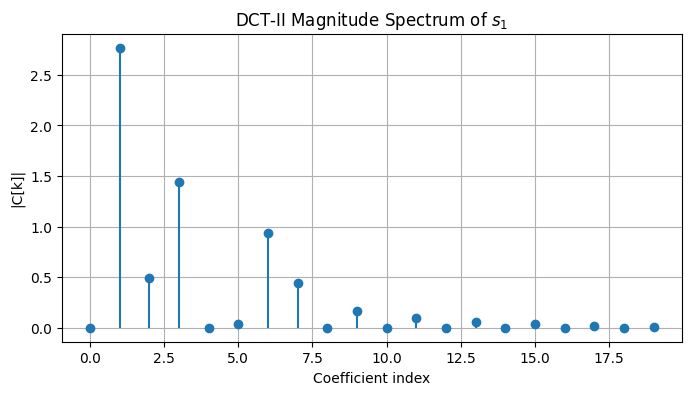

In [29]:
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), np.abs(S_dct), basefmt=" ")
plt.title('DCT-II Magnitude Spectrum of $s_1$')
plt.xlabel('Coefficient index')
plt.ylabel('|C[k]|')
plt.grid(True)
plt.show()

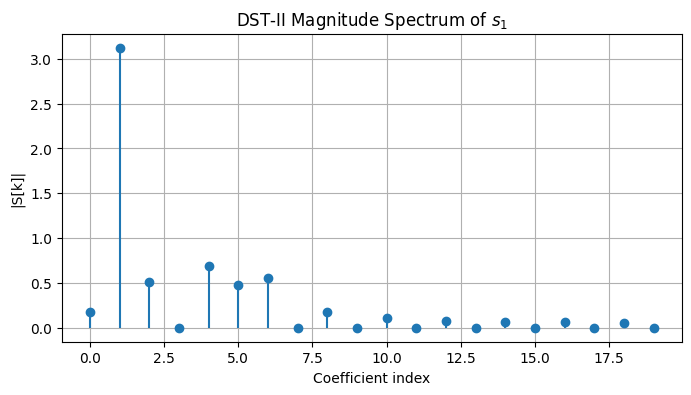

In [30]:
plt.figure(figsize=(8, 4))
plt.stem(np.arange(N), np.abs(S_dst), basefmt=" ")
plt.title('DST-II Magnitude Spectrum of $s_1$')
plt.xlabel('Coefficient index')
plt.ylabel('|S[k]|')
plt.grid(True)
plt.show()

##Plotting Discrete Signal s2


In [15]:
n = np.arange(0, 30)
s2 = (1/2)**n

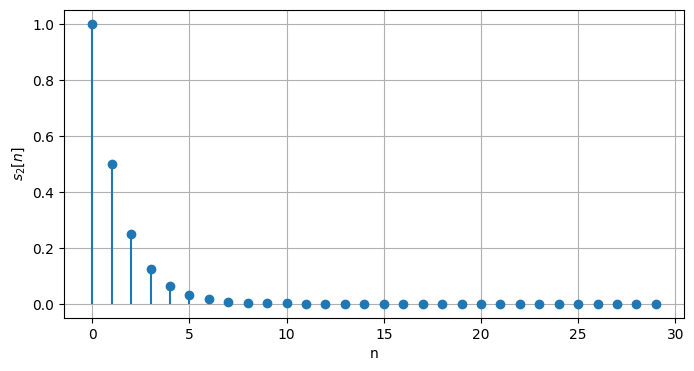

In [17]:
plt.figure(figsize=(8, 4))
plt.stem(n, s2, basefmt=" ")
# plt.title(r"Discrete Signal $s_2[n] = (\tfrac12)^n u[n]$")
plt.xlabel('n')
plt.ylabel('$s_2[n]$')
plt.grid(True)
plt.show()

##Different Plots of signal s2
Plotting DFT, DCT and DST

In [31]:
S2_fft = dft(s2)
S2_dct = dct(s2)
S2_dst = dst(s2)

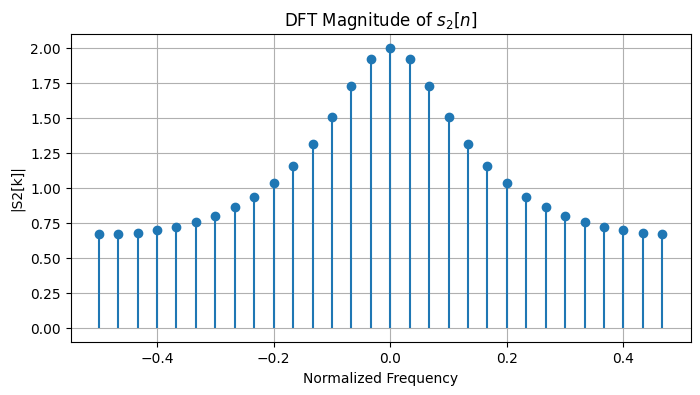

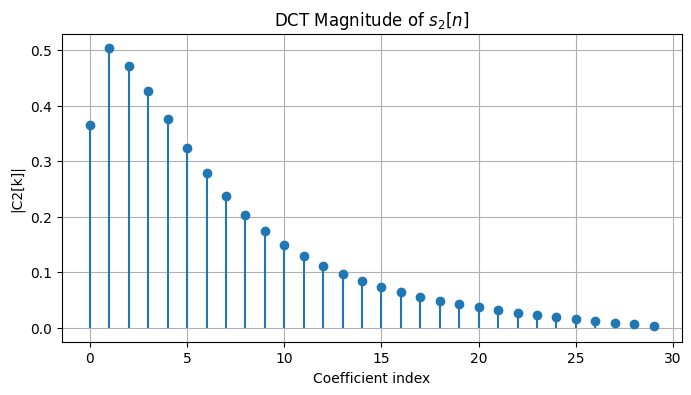

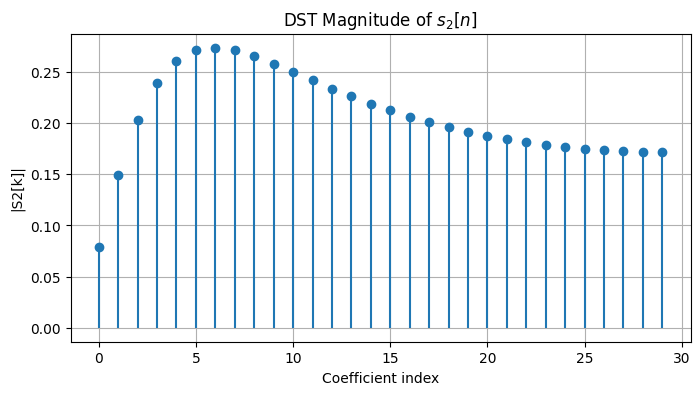

In [32]:
plt.figure(figsize=(8, 4))
plt.stem(freqs2, np.abs(S2_fft), basefmt=" ")
plt.title('DFT Magnitude of $s_2[n]$')
plt.xlabel('Normalized Frequency')
plt.ylabel('|S2[k]|')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(s2)), np.abs(S2_dct), basefmt=" ")
plt.title('DCT Magnitude of $s_2[n]$')
plt.xlabel('Coefficient index')
plt.ylabel('|C2[k]|')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.stem(np.arange(len(s2)), np.abs(S2_dst), basefmt=" ")
plt.title('DST Magnitude of $s_2[n]$')
plt.xlabel('Coefficient index')
plt.ylabel('|S2[k]|')
plt.grid(True)
plt.show()

##Reconstruction with different Percentage of Coefficient Retention
For each transform (DFT, DCT, DST), we will:

Retain only 90% / 75% / 45% of coefficients (largest by magnitude).

Zero out the remaining coefficients.

Compute Inverse Transform

In [37]:
def retain_largest(x, pct):
    N = len(x)
    M = int(np.floor(pct * N))
    idx = np.argsort(np.abs(x))
    mask = np.zeros(N, bool)
    mask[idx[-M:]] = True
    y = np.zeros_like(x)
    y[mask] = x[mask]
    return y

results = {}
for pct in [0.9, 0.75, 0.45]:
    pct_label = int(pct * 100)
    # DFT
    S_fft_ret = retain_largest(S2_fft, pct)
    rec_fft = idft(S_fft_ret)            # Edited: manual IDFT
    mse_fft = np.mean((s2 - rec_fft)**2)
    # DCT
    S_dct_ret = retain_largest(S2_dct, pct)
    rec_dct = idct(S_dct_ret)            # Edited: manual IDCT
    mse_dct = np.mean((s2 - rec_dct)**2)
    # DST
    S_dst_ret = retain_largest(S2_dst, pct)
    rec_dst = idst(S_dst_ret)            # Edited: manual IDST
    mse_dst = np.mean((s2 - rec_dst)**2)

    results[pct_label] = (mse_fft, mse_dct, mse_dst)

# Display with pandas
df = pd.DataFrame.from_dict(
    results, orient='index', columns=['MSE_DFT', 'MSE_DCT', 'MSE_DST']
)
df.index.name = 'Retention (%)'
print(df)

# # Edited: plot MSE vs retention
# plt.figure(figsize=(6,4))
# df.plot(marker='o', legend=True)
# plt.title('MSE vs Coefficient Retention')
# plt.xlabel('Retention (%)')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

                MSE_DFT   MSE_DCT   MSE_DST
Retention (%)                              
90             0.001491  0.000004  0.001443
75             0.003887  0.000073  0.006499
45             0.011031  0.001251  0.017614
